In [40]:
# librairies

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

# datasets 
file_1 = r"..\data\raw\amz_uk_processed_data.csv"
df_amz_uk = pd.read_csv(file_1)

# import py class functions files by steps
%load_ext autoreload
%autoreload 2
from utils.exploration import AmazonExploration
from utils.preprocessing import AmazonDataPreprocessor, plot_final_distributions
from utils.eda import AmazonEDA
from utils.recommender import AmazonRecommender


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# First Step : Exploration 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB

Null Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

NaN Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
p

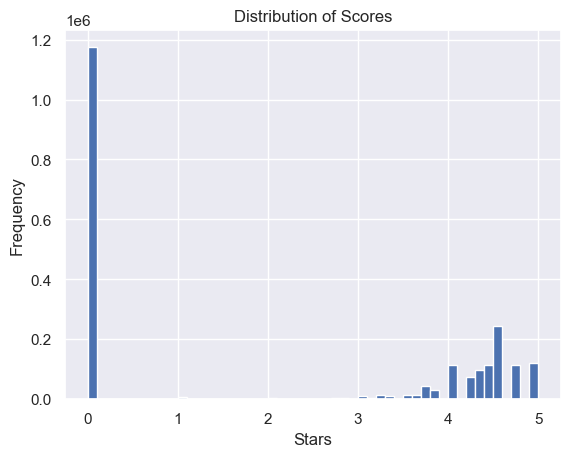

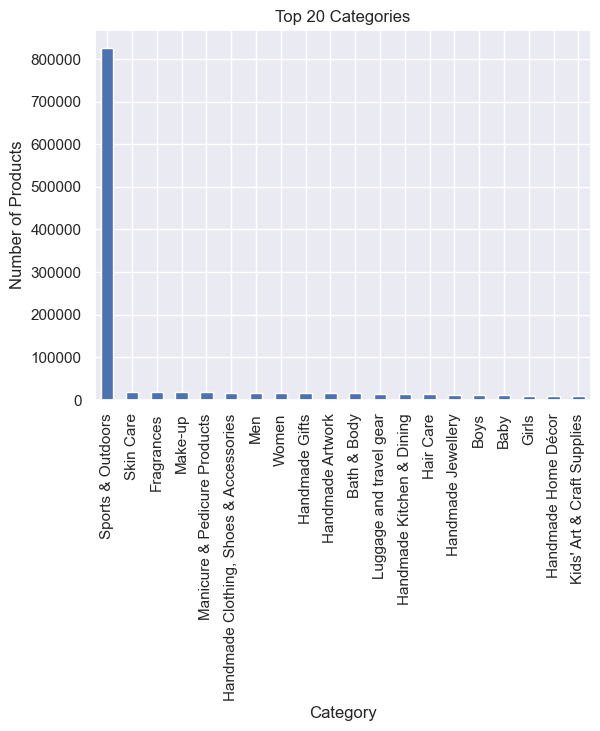

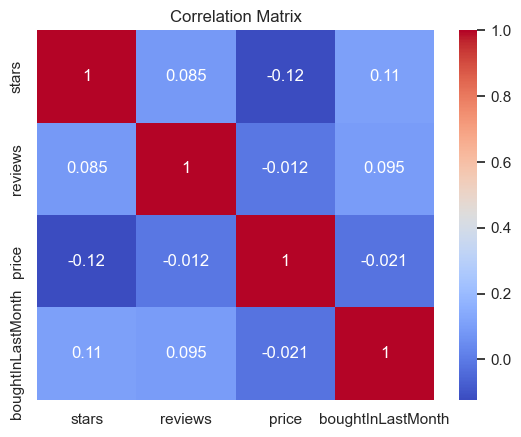

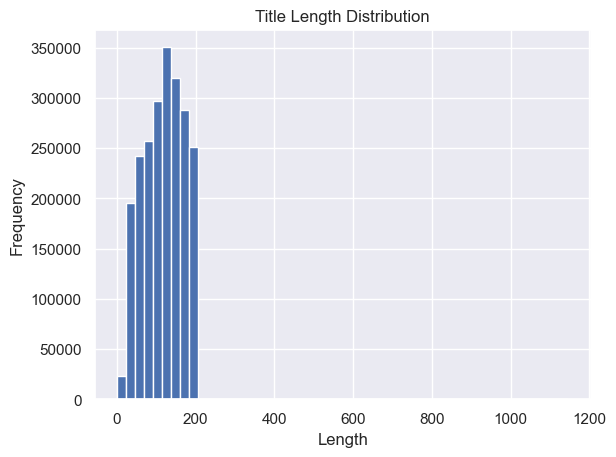

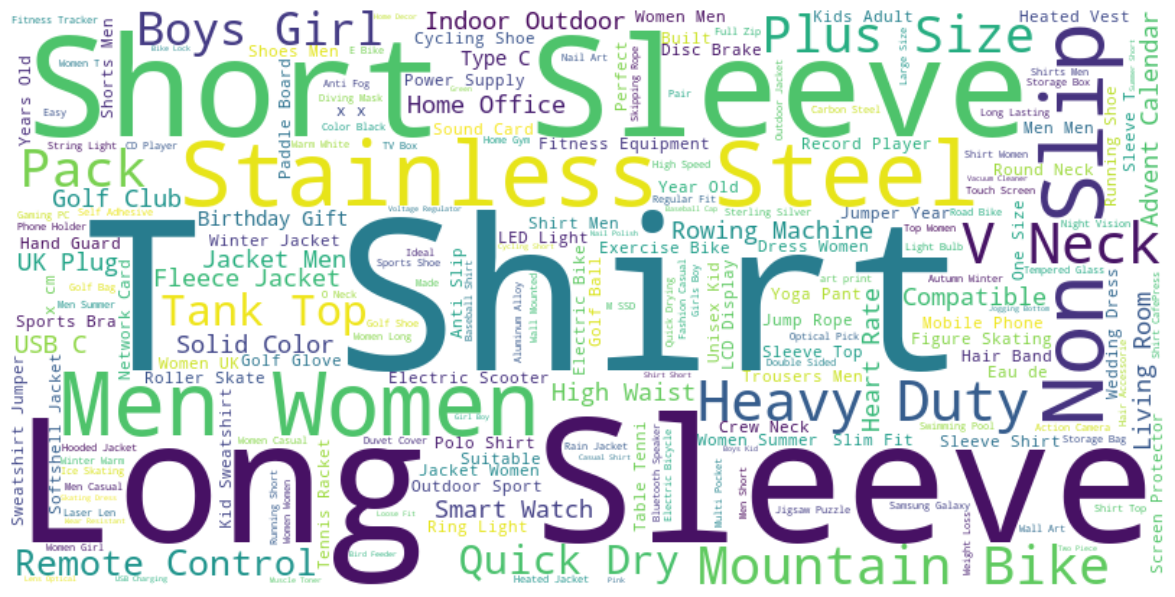

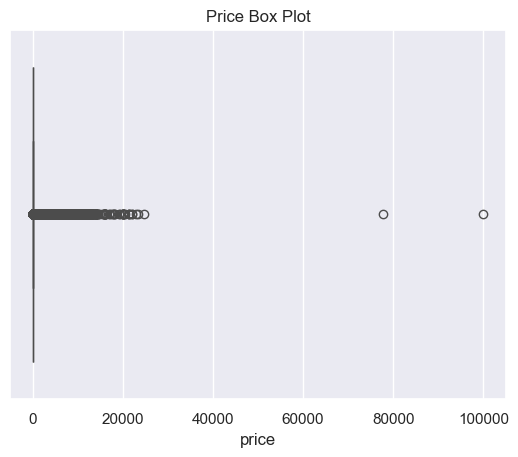

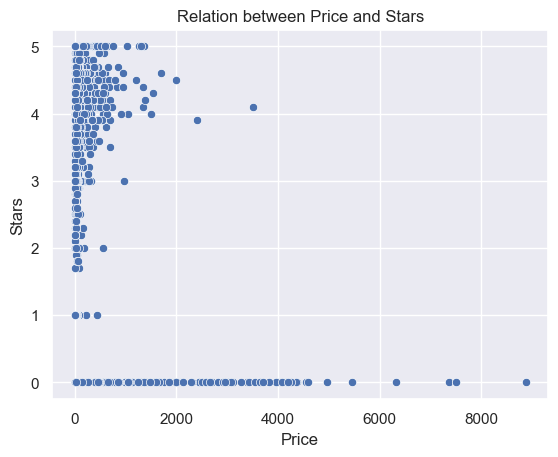

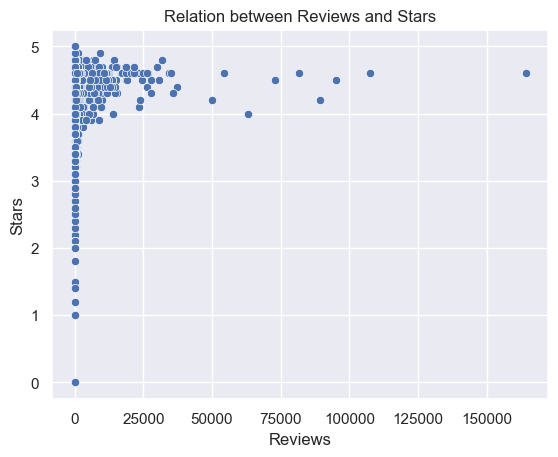

In [19]:
# Init Exploration of the raw dataset
explo = AmazonExploration(df_amz_uk)

# Execute analysis
explo.dataset_summary()
explo.descriptive_analysis()
explo.visualize_stars_distribution()
explo.visualize_top_categories()
explo.plot_correlation_matrix()
explo.analyze_textual_variables()
explo.visualize_outliers()
explo.analyze_relationships()

# Second step : Cleaning

Starting processing...
Initial number of entries: 2222742
After cleaning: 1046846 entries
Features created


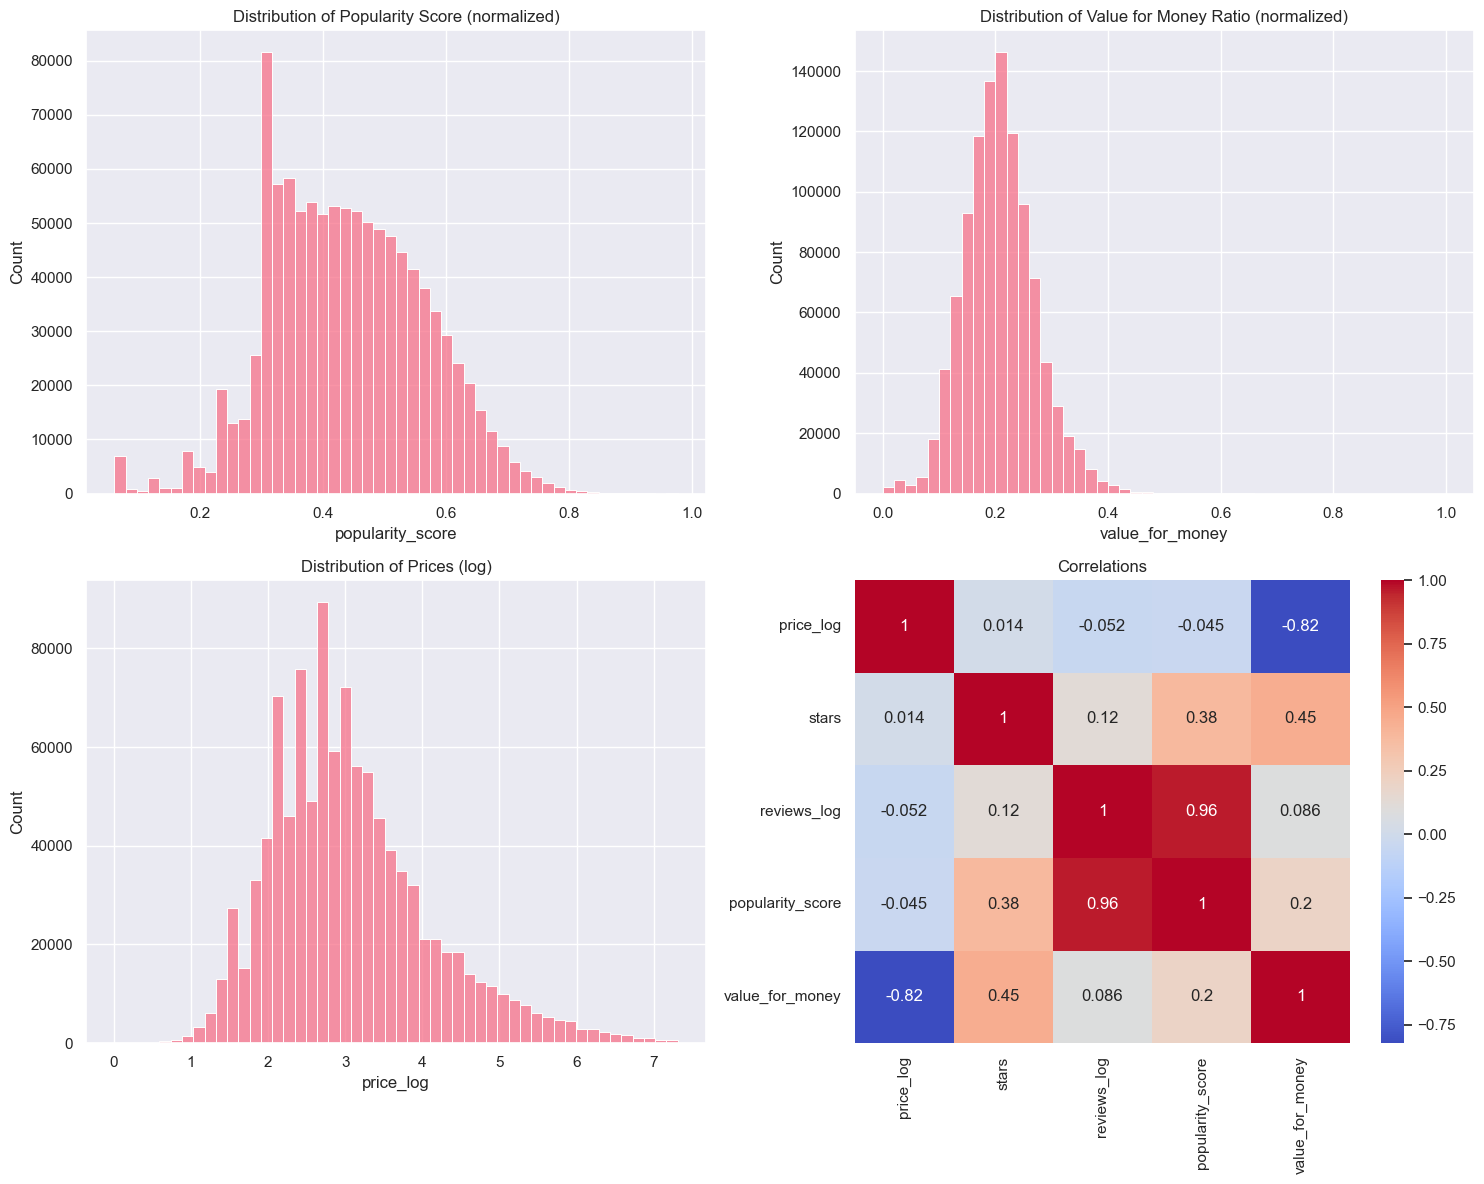

In [41]:
# Init preprocess
preprocessor = AmazonDataPreprocessor()

# Reload
df_raw = pd.read_csv(file_1)
df_processed = preprocessor.prepare_data(df_raw)

# Call all distribitions plots
plot_final_distributions(df_processed)


# Third Step : EDA

## Exploratory Analysis of Amazon UK Data

### Category Distribution

#### Number of Products per Category
- The ‘Sports & Outdoors’ category largely dominates the dataset with around 140,000 products.
- The categories related to personal care (Skin Care, Make-up) and fashion (Men, Women) follow but with a significant gap.
- The top 10 categories show a high concentration of convenience products

#### Average prices per category
- Technology products dominate the most expensive categories:
  * Laptops in first place
  * Desktop PCs in second place
  * Followed by lenses, 3D Printers, and Graphics Cards
- Average prices significantly higher for electronics than for other categories
- Winter sports products (Snowboards) also appear in the higher-priced categories

#### Average scores by category
- Handmade categories dominate the top scores:
  * ‘Gifts for Him’
  * Handmade Artwork
  * Handmade Baby Products
- Technological and electronic products do not appear in the top 10 scores
- Generally high average scores (>4/5) for handmade categories

#### Best-Sellers by Category

- Health & Personal Care’ dominates the number of bestsellers
- Grocery’ and “Sports & Outdoors” follow with a significant number of bestsellers
- The basic categories (health, food, sport) are the most represented
- Baby’ and “Pet Supplies” categories feature prominently in the top 10



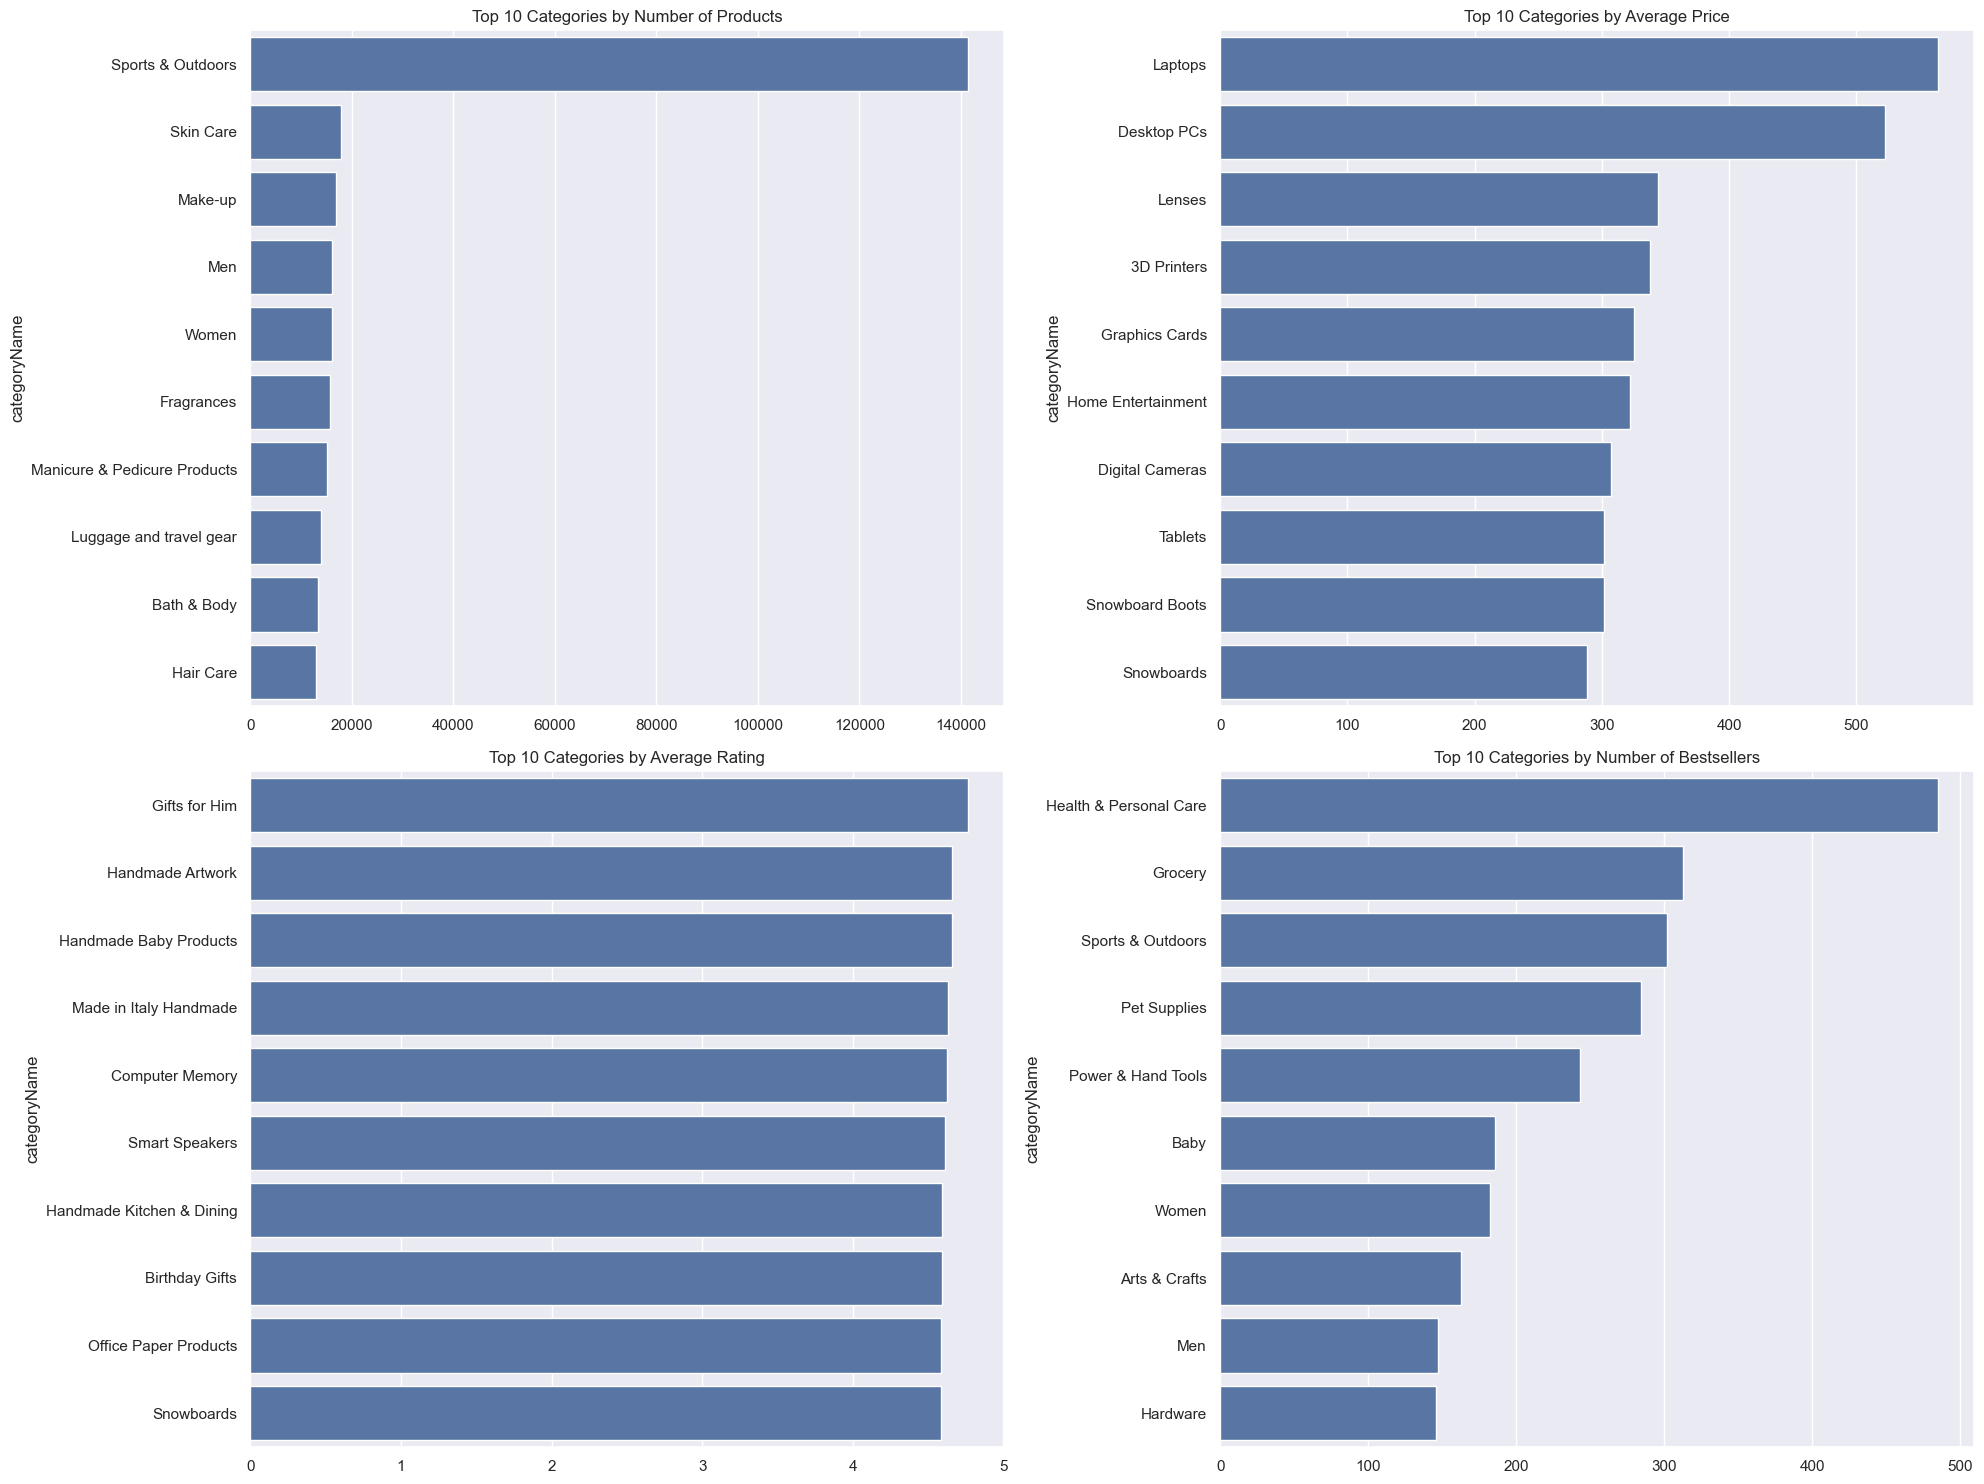


Statistiques des catégories:
Nombre total de catégories: 296
Moyenne de produits par catégorie: 3536.64


In [42]:
# Init EDA
eda = AmazonEDA()

# Categories analysis
category_stats = eda.analyze_categories(df_processed)
print("\nStatistiques des catégories:")
print(f"Nombre total de catégories: {category_stats['total_categories']}")
print(f"Moyenne de produits par catégorie: {category_stats['avg_products_per_category']:.2f}")

# Fourth Step : Recommendation System

## Key Insights for the Recommendation System

1. **Price segmentation**
    - Strong contrast between technology and non-technology categories
    - Need to standardise prices by category in the recommendation system
2. **Potential Pitfalls**
    - Over-representation of Sports & Outdoors
    - Very high scores in some categories
3. **Recommendation Strategies**
    - Consider recommendations by price range
    - Take account of popularity (bestsellers) differently according to category
    - Potentially weight scores by category
4. **Attention Points**
    - Wide variation in prices between categories
    - Dominance of certain categories in terms of number of products
    - Uneven distribution of bestsellers

Creating features...
Training the KNN model...
Training completed!

=== Similar Product Recommendations ===
Reference product: Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal



c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


                                                     title  \
1582230  KabelDirekt – Pure Copper Stereo Audio Speaker...   
2018978  MONT MARTE Acrylic Paint Set 24 Colours 36ml, ...   
655389   George Foreman 25800 Small Fit Grill - Versati...   
975245   BG Electrical Double Weatherproof Outdoor Swit...   
609689   BRITA Filters for Maxtra+ Water Filter Jug, Pl...   

                                categoryName  price  stars  similarity_score  \
1582230       Hi-Fi & Home Audio Accessories  21.99    4.7          0.999981   
2018978                        Arts & Crafts  21.99    4.7          0.999938   
655389              Small Kitchen Appliances  21.95    4.6          0.999936   
975245                 Industrial Electrical  21.87    4.6          0.999936   
609689   Water Coolers, Filters & Cartridges  21.31    4.7          0.999975   

         diversity_contribution  price_diversity  final_score  
1582230                1.209348         1.000000     1.083732  
2018978           

c:\Users\aurel\Desktop\Ironhack\Course\3_Projects\module_3\Last_project_IH\notebooks\utils\recommender.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
c:\Users\aurel\Desktop\Ironhack\Course\3_Projects\module_3\Last_project_IH\notebooks\utils\recommender.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


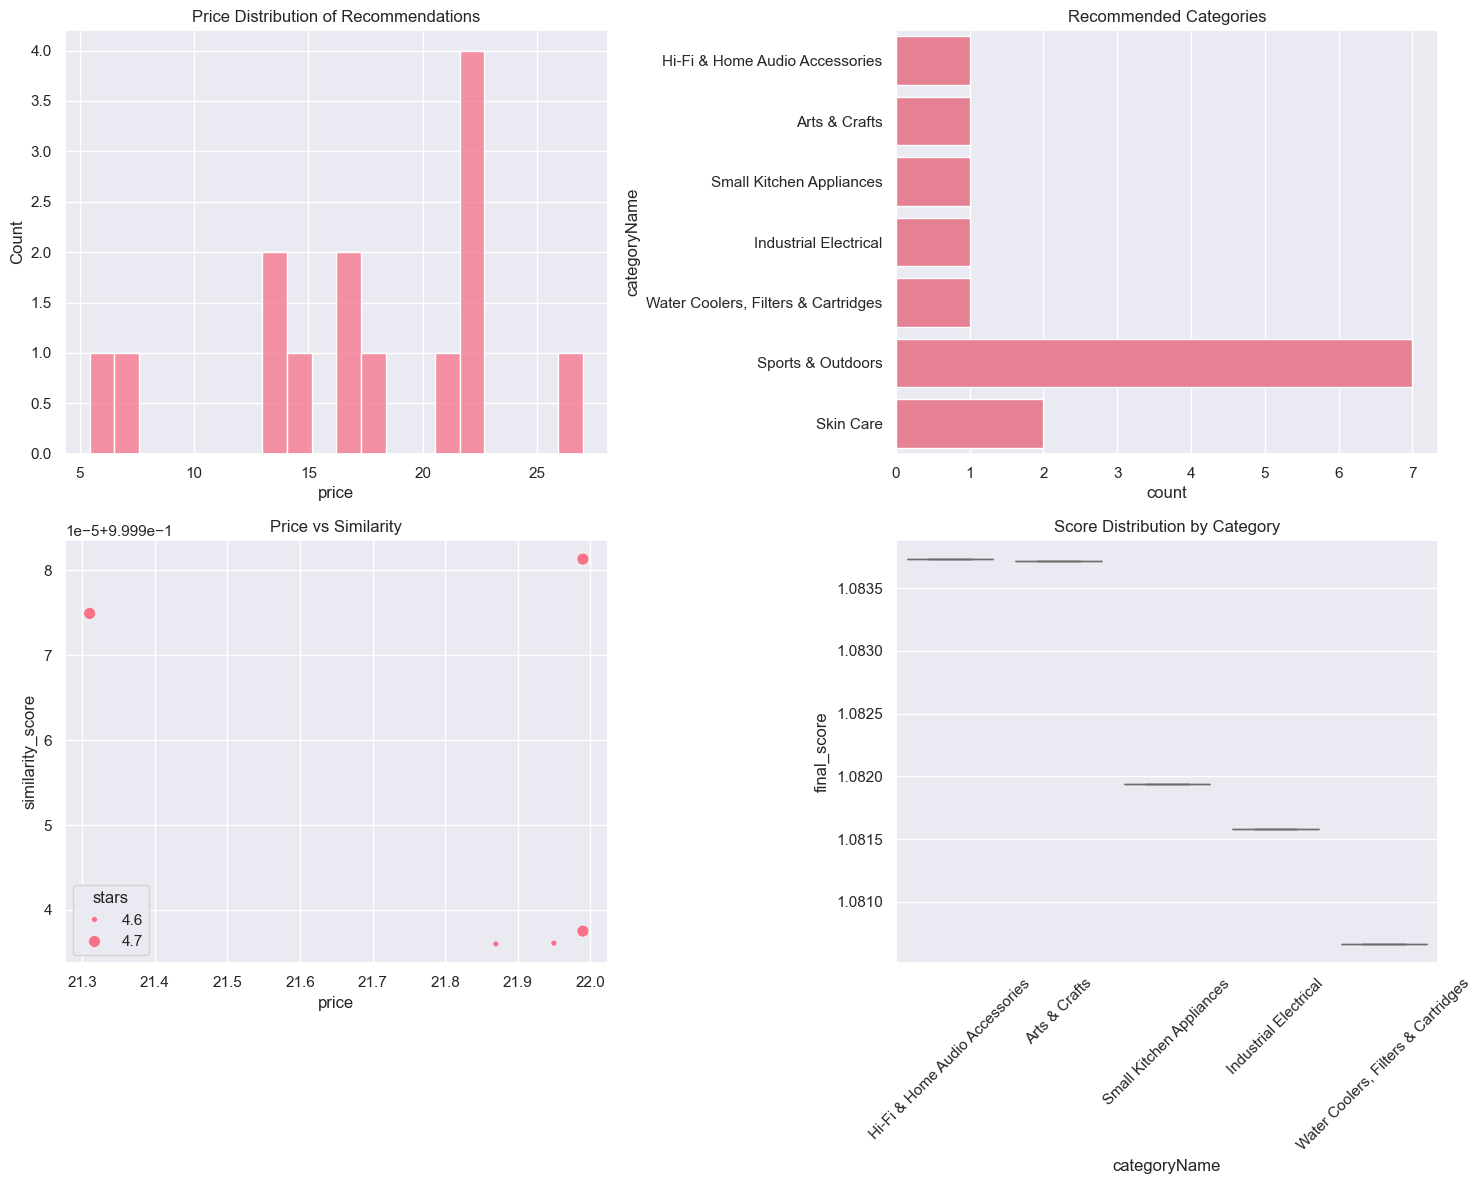

In [32]:
# Configuration of visualizations
sns.set_theme()
sns.set_palette("husl")

# Init recommender
recommender = AmazonRecommender(price_variation=0.3)
recommender.fit(df_processed)

# Test different types of recommendations
def display_recommendations(recommender, df_processed):
    """
    Displays and visualizes the different recommendations
    """
    try:
        # 1. Similar recommendations
        product_id = df_processed.index[0]
        print("\n=== Similar Product Recommendations ===")
        print(f"Reference product: {df_processed.loc[product_id, 'title']}\n")
        similar_products = recommender.get_similar_products(product_id, n=5)
        print(similar_products)
        
        # 2. Category-based recommendations
        print("\n=== Category-based Recommendations ===")
        category_recs = recommender.get_category_recommendations('Sports & Outdoors', n=5)
        print(category_recs[['title', 'price', 'stars', 'combined_score']])
        
        # 3. Personalized recommendations
        print("\n=== Personalized Recommendations ===")
        user_prefs = {
            'preferred_categories': ['Sports & Outdoors', 'Skin Care'],
            'price_range': (10, 100),
            'min_rating': 4.0
        }
        personalized_recs = recommender.get_personalized_recommendations(user_prefs, n=5)
        print(personalized_recs)
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Ensure all DataFrames have the necessary columns
        category_recs_viz = category_recs.copy()
        category_recs_viz['categoryName'] = 'Sports & Outdoors'  # Add the missing column
        
        # Price distribution
        all_recs = pd.concat([
            similar_products[['price', 'categoryName']],
            category_recs_viz[['price', 'categoryName']],
            personalized_recs[['price', 'categoryName']]
        ], ignore_index=True)
        
        sns.histplot(data=all_recs, x='price', bins=20, ax=axes[0,0])
        axes[0,0].set_title('Price Distribution of Recommendations')
        
        # Category distribution
        sns.countplot(data=all_recs, y='categoryName', ax=axes[0,1])
        axes[0,1].set_title('Recommended Categories')
        
        # Price vs Similarity (for similar products)
        if 'similarity_score' in similar_products.columns:
            sns.scatterplot(
                data=similar_products,
                x='price',
                y='similarity_score',
                size='stars',
                ax=axes[1,0]
            )
            axes[1,0].set_title('Price vs Similarity')
        
        # Score distribution
        if 'final_score' in similar_products.columns:
            sns.boxplot(
                data=similar_products,
                y='final_score',
                x='categoryName',
                ax=axes[1,1]
            )
            axes[1,1].set_title('Score Distribution by Category')
            axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Running tests
try:
    display_recommendations(recommender, df_processed)
except Exception as e:
    print(f"An error occurred: {str(e)}")


### Analysis of the Amazon UK Recommendation System

#### 1. Analysis of Similar Recommendations

##### Recommendation Performance
- Very good category diversity with 5 different areas:
 * Hi-Fi & Audio Accessories
 * Arts & Crafts
 * Small Kitchen Appliances
 * Industrial Electrical
 * Water Coolers & Filters

##### Metric Wrenches
- Consistent price range: £21.31 - £21.99
- Consistently high ratings: 4.6-4.7 stars
- Very high similarity scores: >0.999
- Contributive diversity scores: ~1.20
- Final scores: 1.080-1.083

#### 2. Recommendations by Category (Sports & Outdoors)

##### Features
- Wide price range: £5.44 - £16.71
- Excellent ratings: 4.5-4.8 stars
- Variety of sub-categories:
 * Training Equipment
 * First Aid
 * Sportswear
 * Accessories

##### Combined Scores
- High scores: 0.90-0.93
- Good quality/price/popularity balance

#### 3. Personalised recommendations

##### Category Distribution
- Balance between Skin Care and Sports & Outdoors
- Price range: £13.30 - £26.99
- Consistent 4.8 star rating

##### Value for Money
- Scores between 0.20 and 0.25
- Best ratios for Sports & Outdoors products

#### 4. Analysis of Visualisations

##### Price distribution
- Main peak around £21-22
- Secondary distribution between £5-15
- Good overall distribution

##### Recommended Categories
- Balanced dominance of main categories
- Sports & Outdoors more represented
- Good overall diversity

##### Price vs Similarity
- Positive correlation between price and similarity
- Effective clustering of similar products

##### Scores by Category
- Consistent final scores between 1.081 and 1.084
- Low variation between categories, indicating good stability

#### 5. System strengths
1. Diversity of recommendations
2. Consistency of awards in each category
3. Consistent quality (high scores)
4. Good balance between similarity and diversification


In [49]:
# One more try ! 

try:
    # Recommandations similaires
    product_id = df_processed.index[0]
    similar_products = recommender.get_similar_products(product_id, n=5)
    print("\nRecommandations similaires (version finale):")
    print(similar_products)
    
    # Recommandations par catégorie
    category_recs = recommender.get_category_recommendations(
        category='Sports & Outdoors', 
        n=5,
        include_related=True
    )
    if category_recs is not None:
        print("\nRecommandations par catégorie (version finale):")
        print(category_recs)

except Exception as e:
    print(f"Une erreur s'est produite : {str(e)}")
    import traceback
    traceback.print_exc()

c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(



Recommandations similaires (version finale):
                                                     title  \
6        Echo Dot (5th generation, 2022 release) | Big ...   
1597957  Women's Multipack Performance Heel Tab Athleti...   
540781   SanDisk Extreme PRO 64GB SDXC Memory Card up t...   
540071   SanDisk 128GB microSDXC card for Nintendo Swit...   

                  categoryName  price  stars  similarity_score  \
6               Hi-Fi Speakers  21.99    4.7          1.000000   
1597957  Customers' Most Loved  21.09    4.8          0.788537   
540781        PC & Video Games  20.90    4.8          0.789286   
540071        PC & Video Games  13.99    4.8          0.788392   

         category_diversity  price_diversity  final_score  
6                  0.200112         1.000000     0.720039  
1597957            2.164043         0.958211     1.320866  
540781             1.365359         0.949161     1.038874  
540071             1.365359         0.547755     0.918139  


c:\Users\aurel\Desktop\Ironhack\Course\3_Projects\module_3\Last_project_IH\notebooks\utils\recommender.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_reviews = recommendations['reviews'].max()



Recommandations par catégorie (version finale):
                                                     title       categoryName  \
897320                          PUMA Kratero Screw-in Boot  Sports & Outdoors   
1187506  PRG Golf Originals. Drive For Show Driver Head...  Sports & Outdoors   
83794    Bicycle Tablet Holder Phone Holder 3.5-10inch ...  Sports & Outdoors   
1906418  Marmot Women's Neaera Short-sleeve Shirt Women...  Sports & Outdoors   
84430    BeisDirect Carrying Case Suitable for DJI Osmo...  Sports & Outdoors   

         price  stars price_segment  final_score  
897320   32.39    5.0          high     0.864825  
1187506  31.45    5.0        medium     0.847683  
83794    21.99    5.0           low     0.697383  
1906418  48.64    5.0     very_high     0.691419  
84430    13.99    5.0      very_low     0.591009  


# Fifth Step : Evaluation metrics 

Évaluation du système de recommandation...


c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha


Résultats de l'évaluation :

Diversity :
- category: 0.997
- price: 0.025
- rating: nan

Relevance :
- category: 0.887
- price: 0.977
- rating: 0.744

Novelty: 0.830

Coverage: 0.000


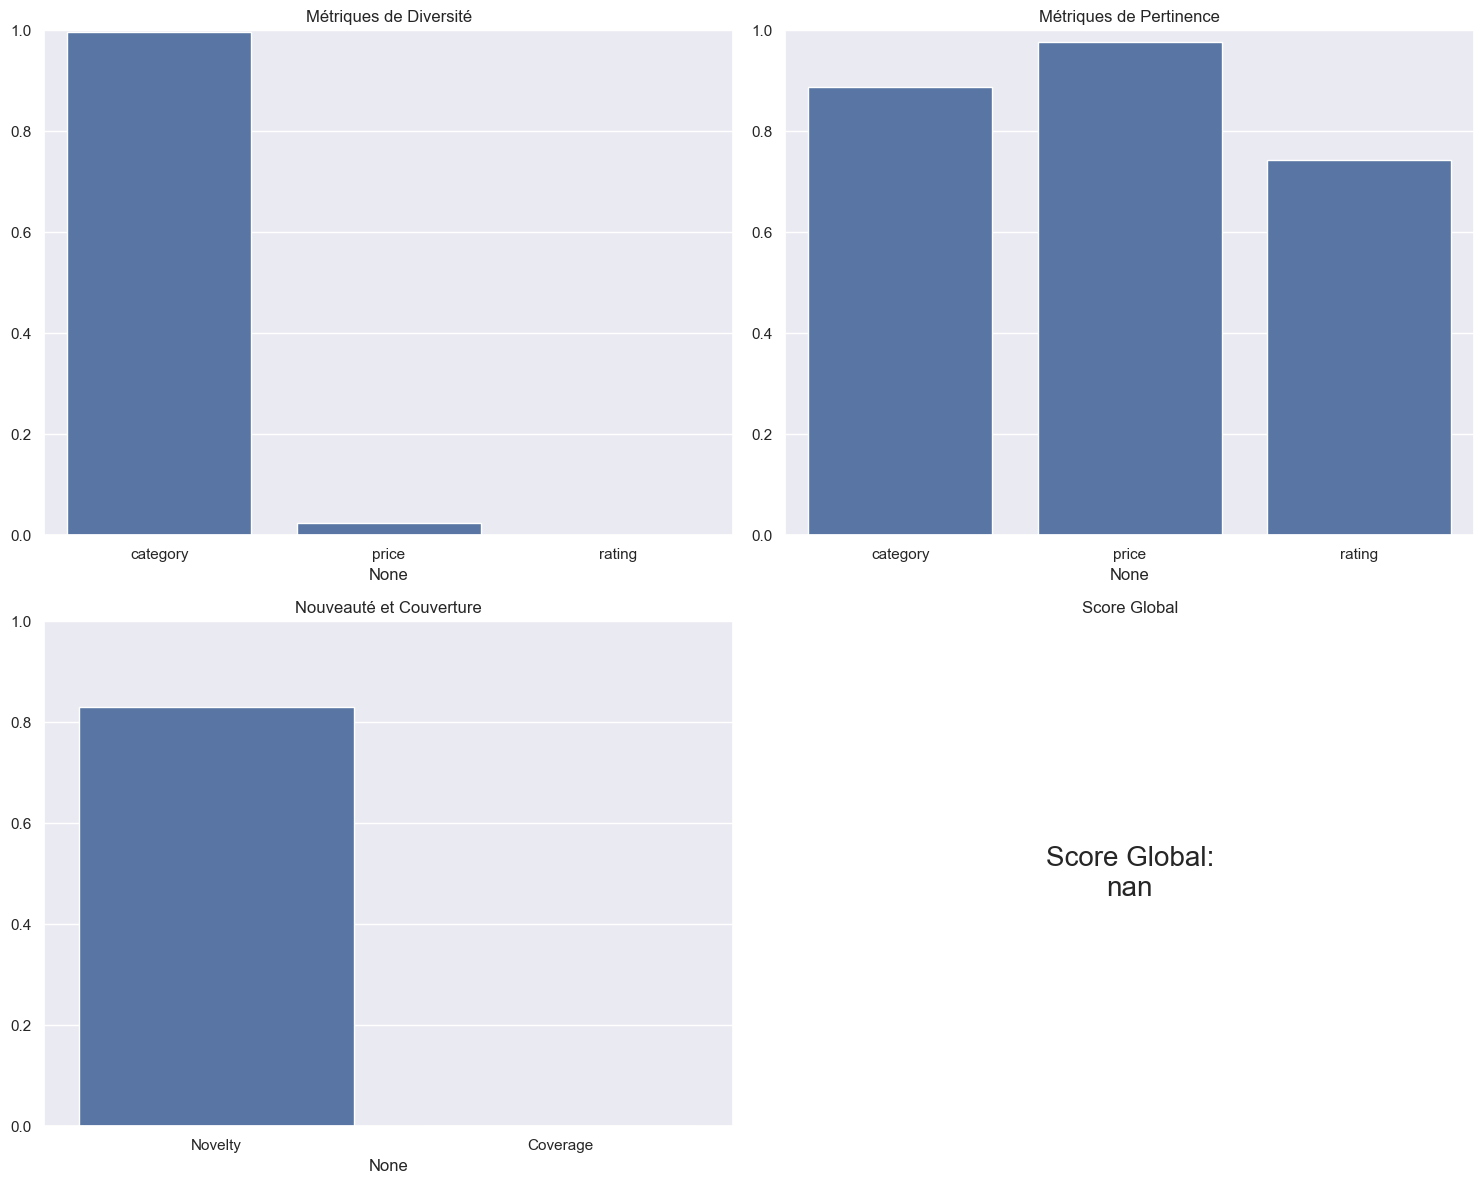


Score global du système : nan


In [50]:
from utils.evaluation import RecommenderEvaluator

# Initialisation de l'évaluateur
evaluator = RecommenderEvaluator(recommender, df_processed)

# Évaluation du système
print("Évaluation du système de recommandation...")
evaluation_results = evaluator.evaluate_similar_products(n_samples=100)

# Affichage des résultats
print("\nRésultats de l'évaluation :")
for metric_type, metrics in evaluation_results.items():
    if isinstance(metrics, dict):
        print(f"\n{metric_type.capitalize()} :")
        for name, value in metrics.items():
            print(f"- {name}: {value:.3f}")
    else:
        print(f"\n{metric_type.capitalize()}: {metrics:.3f}")

# Visualisation des résultats
global_score = evaluator.plot_evaluation_results(evaluation_results)
print(f"\nScore global du système : {global_score:.3f}")